# Ventes Amazon 2025 Mod√®les EDA avec models de machine Learning

### Dataset Description:

Amazon Sales 2025 Complete EDA

Cet ensemble de donn√©es contient des informations d√©taill√©es sur les produits Amazon, leurs prix, 
leurs sch√©mas de remises, leurs notes, leurs avis et leurs m√©tadonn√©es. Il comprend plus de 1 000 fiches produits,
extraites du site web d'Amazon gr√¢ce √† BeautifulSoup et WebDriver.


Fonctionnalit√©s principales¬†:
product_id ‚Üí Identifiant unique pour chaque produit
product_name ‚Üí Nom du produit
category ‚Üí Cat√©gorie de produit (par exemple, √©lectronique, v√™tements)
discounted_price ‚Üí Prix final r√©duit
actual_price ‚Üí Prix affich√© initial
discount_percentage ‚Üí Remise appliqu√©e en pourcentage
rating ‚Üí Note moyenne des clients
rating_count ‚Üí Nombre de clients ayant √©valu√©
about_product ‚Üí Br√®ve description
user_id, user_name ‚Üí D√©tails de l'√©valuateur
review_id, review_title, review_content ‚Üí D√©tails de l'avis
img_link, product_link ‚Üí Image du produit et lien officiel

Source: Scraped from Amazon official website

√ânonc√© du probl√®me m√©tier¬†:
Les plateformes e-commerce g√©n√®rent chaque jour d'√©normes quantit√©s de donn√©es.
D√©fi principal¬†: Comprendre les moteurs de vente.
Cet ensemble de donn√©es nous permet de¬†:
Analyser l'impact des remises, des prix et des avis clients¬†;
Identifier les cat√©gories et produits les plus performants¬†;
√âtudier l'influence des √©valuations et des retours clients sur les d√©cisions¬†;
Explorer les tendances de performance commerciale pour √©tayer la strat√©gie.

Objectifs de l'analyse¬†:
R√©aliser une analyse exploratoire des donn√©es (EDA) sur les produits, les prix et les avis clients
Visualiser les tendances et les relations entre les attributs et l'int√©r√™t
Identifier les facteurs cl√©s de performance des produits
Cr√©er des mod√®les pr√©dictifs pour la pr√©vision et la classification
Fournir des informations exploitables pour optimiser les strat√©gies de tarification et de marketing

R√©sum√©¬†:
L'ensemble de donn√©es offre un aper√ßu d√©taill√© des fiches produits Amazon.
Il permet d'analyser les remises, les prix, les notes et les avis.
Il aide les vendeurs et les entreprises √† prendre des d√©cisions fond√©es sur les donn√©es.
Il permet la mod√©lisation pr√©dictive des performances futures des produits.

### Importation des Librairies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display, HTML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Paellete
palette = ['#420b08', '#fad2cf']
color_palette = sns.color_palette(palette)


In [6]:
# !pip install xgboost

In [7]:
# Importation du Dataset
df = pd.read_csv('amazon.csv')

In [8]:
# Affichage des 5 premieres lignes
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ399   
1  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
2  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ199   
3  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ329   
4  Computers&Accessories|Accessories&Peripherals|...             ‚Çπ154   

  actual_price discount_percentage rating rating_count  \
0       ‚Çπ1,099                 64%    4.2       24,269   
1         ‚Çπ349                 43%    4.0       43,994   
2       ‚Çπ1,899                 90%    3.9        7,928   
3         ‚Çπ699                 53%    4.2       94,363   
4         ‚Çπ399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  „Äê Fast Charger& Data Sync„Äë-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

### Nomes des colonnes et types de donnees

In [9]:
# Verifions les noms de colonnes
print("Nomes des colonnes : \n", df.columns.tolist())

Nomes des colonnes : 
 ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [10]:
### Informations detaillees
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### Aper√ßu des valeurs manquantes

In [11]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Observation de notre Dataset

Ici notre dataset contient 1465 lignes et 16 colonnes.

La plupart des colonnes sont stock√©es sous forme d'objet (cha√Æne), 
ce qui peut n√©cessiter une transformation ult√©rieure.

Les colonnes incluent les d√©tails du produit, les prix, les remises, les notes, les avis et les liens.

Certaines colonnes comportent des valeurs manquantes qui seront trait√©es lors du pr√©traitement.

### Nettoyage et pr√©traitement des donn√©es

#### Convertir les types de donn√©es

In [12]:
# Convertir les prix en float
df['discounted_price'] = (
    df['discounted_price'].str.replace("‚Çπ", "").str.replace(",", "").astype(float)
)
df['actual_price'] = (
    df['actual_price'].str.replace("‚Çπ", "").str.replace(",", "").astype(float)
)

# Convertir le pourcentage de remise en fraction
df['discount_percentage'] = (
    df['discount_percentage'].str.replace("%", "").astype(float) / 100
)

# Nettoyer et convertir les notes
df['rating'] = df['rating'].replace("|", "3.9").astype(float)

# Convertir rating_count en num√©rique
df['rating_count'] = df['rating_count'].str.replace(",", "").astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### Gestion des valeurs manquantes

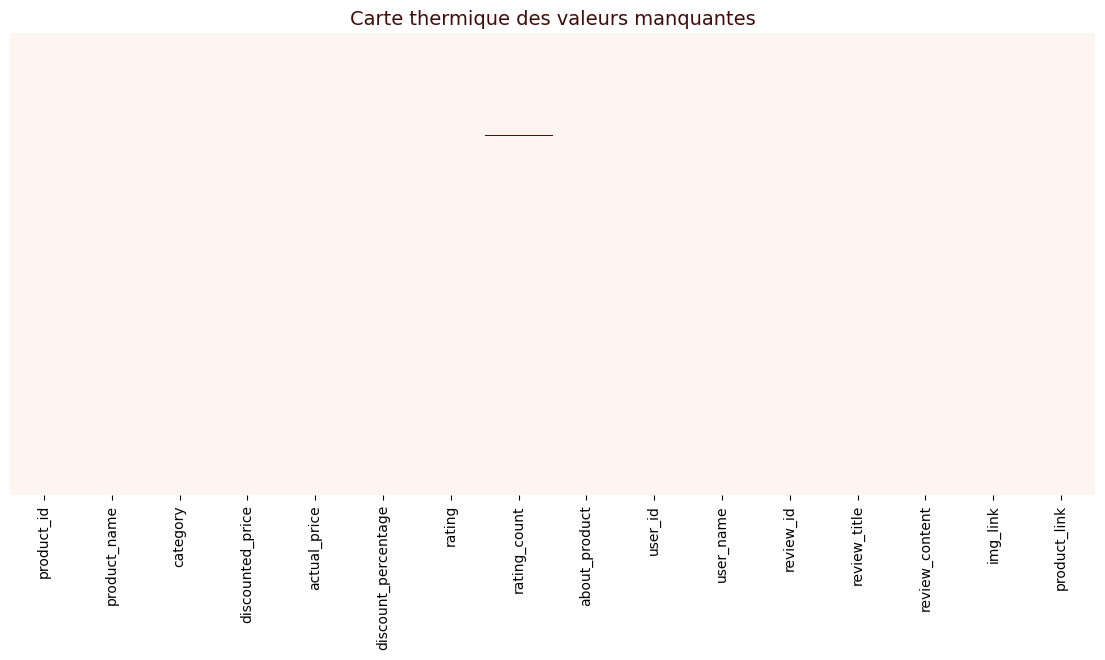

Valeurs manquantes apr√®s imputation:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [13]:
# V√©rifier les valeurs nulles ou NaN
df.isnull().sum().sort_values(ascending=False)

# Visualisons les valeurs manquantes
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Carte thermique des valeurs manquantes", fontsize=14, color="#420b08")
plt.show()

# Imputer les valeurs manquantes dans rating_count avec la m√©diane
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

print("Valeurs manquantes apr√®s imputation:\n", df.isnull().sum())


### V√©rifions les doublons

In [14]:
duplicates = df.duplicated().sum()
print(f"Nombre de lignes en double: {duplicates}")

Nombre de lignes en double: 0


### Statistiques descriptives

In [15]:
df.describe().T

count          mean           std   min      25%  \
discounted_price     1465.0   3125.310874   6944.304394  39.0   325.00   
actual_price         1465.0   5444.990635  10874.826864  39.0   800.00   
discount_percentage  1465.0      0.476915      0.216359   0.0     0.32   
rating               1465.0      4.096451      0.291620   2.0     4.00   
rating_count         1465.0  18277.634812  42727.398216   2.0  1191.00   

                        50%       75%        max  
discounted_price      799.0   1999.00   77990.00  
actual_price         1650.0   4295.00  139900.00  
discount_percentage     0.5      0.63       0.94  
rating                  4.1      4.30       5.00  
rating_count         5179.0  17325.00  426973.00

#### Observation

Initialement, toutes les colonnes num√©riques cl√©s (prix_r√©duit, prix_r√©el, pourcentage_r√©duction, √©valuation, nombre_√©valuation) 
√©taient stock√©es comme type d'objet.

** Conversion en float, les rendant ainsi utilisables pour l'analyse.
Lors du nettoyage, une valeur inhabituelle ¬´¬†|¬ª a √©t√© d√©tect√©e dans la colonne d'√©valuation.
V√©rifi√© sur Amazon (via product_id) ‚Üí √©valuation r√©elle¬†: 3,9.

** Garantit l'exactitude en validant par rapport √† la source plut√¥t qu'en supprimant ou en devinant les valeurs.
Valeurs de pourcentage de r√©duction normalis√©es en fractions (par exemple, 25¬†% ‚Üí 0,25) pour une interpr√©tation coh√©rente lors de la mod√©lisation.

La colonne nombre_√©valuation pr√©sentait des valeurs manquantes et des probl√®mes de formatage (virgules dans les nombres).
- Valeurs manquantes imput√©es √† l'aide de la m√©diane (r√©sistance aux valeurs aberrantes).

Apr√®s traitement des donn√©es manquantes¬†:
** √âtape 1¬†: Le dataset est d√©sormais n'a pas de valeurs nulles ou nan.

Aucun doublon n'a √©t√© trouv√©¬†:
** √âtape¬†2¬†: Le dataset contient uniquement des entr√©es uniques.

Dans l'ensemble, le dataset est d√©sormais propre, coh√©rent et pr√™t √† √™tre analys√© pour la visualisation et l'exploration des fonctionnalit√©s.

## Visualisation des data

### Analyse univari√©e

### Distribution des caract√©ristiques num√©riques

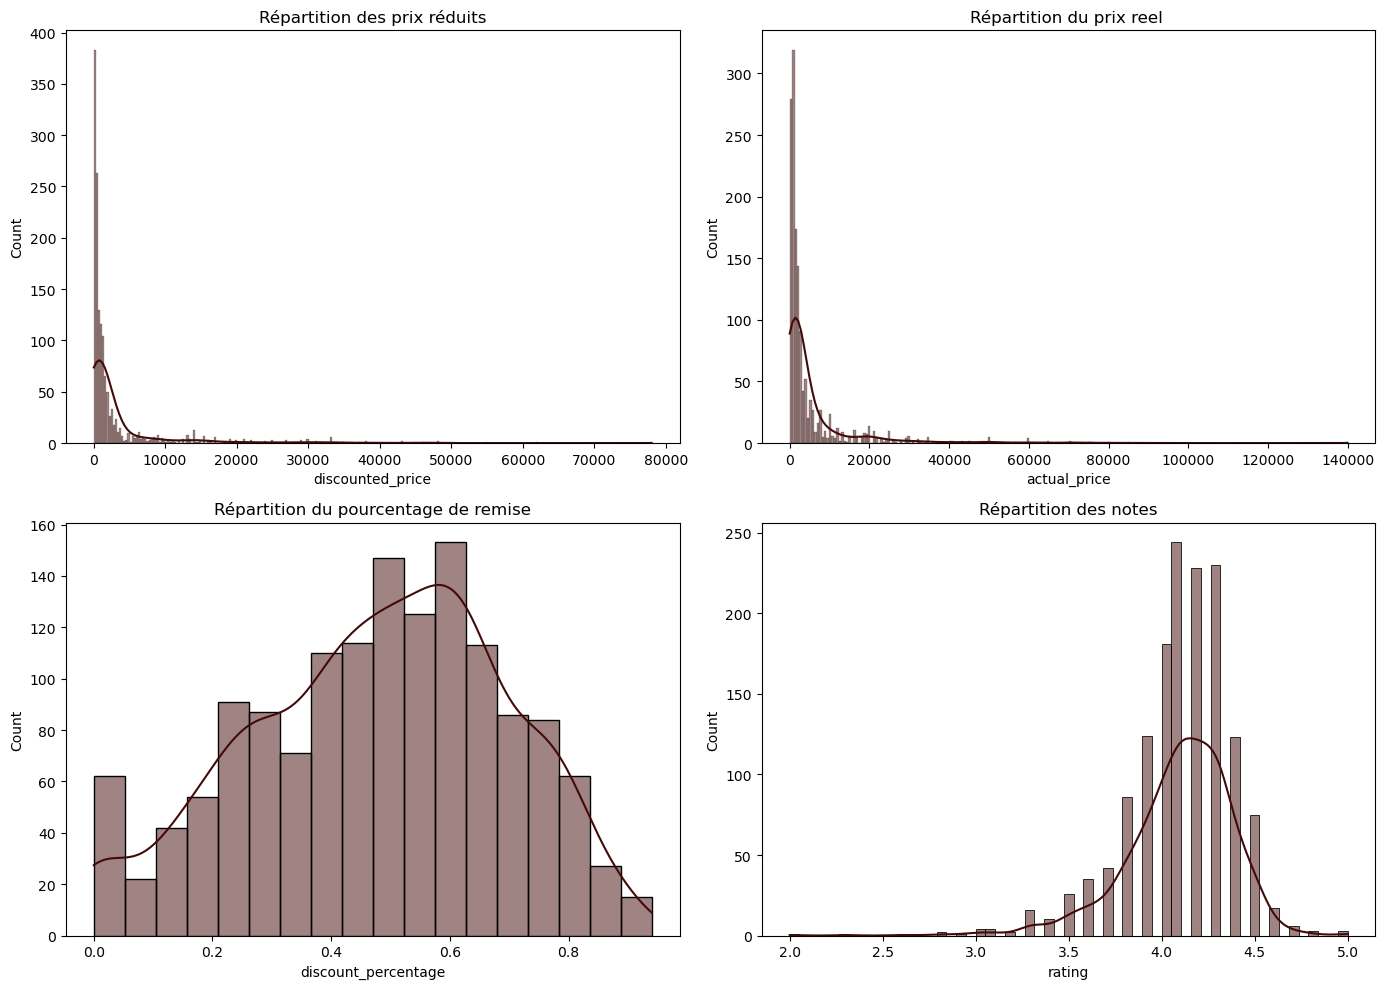

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['discounted_price'], kde=True, ax=axes[0,0], color="#420b08")
axes[0,0].set_title("R√©partition des prix r√©duits")

sns.histplot(df['actual_price'], kde=True, ax=axes[0,1], color="#420b08")
axes[0,1].set_title("R√©partition du prix reel ")

sns.histplot(df['discount_percentage'], kde=True, ax=axes[1,0], color="#420b08")
axes[1,0].set_title("R√©partition du pourcentage de remise")

sns.histplot(df['rating'], kde=True, ax=axes[1,1], color="#420b08")
axes[1,1].set_title("R√©partition des notes")

plt.tight_layout()
plt.show()

### Nombre de notes

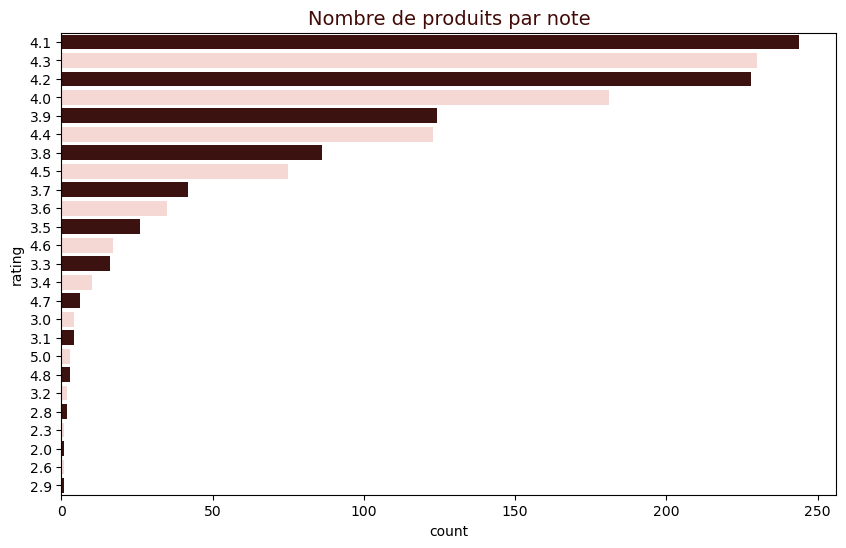

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette=palette)
plt.title("Nombre de produits par note", fontsize=14, color="#420b08")
plt.show()

## Analyse bivari√©e

### Prix vs notation

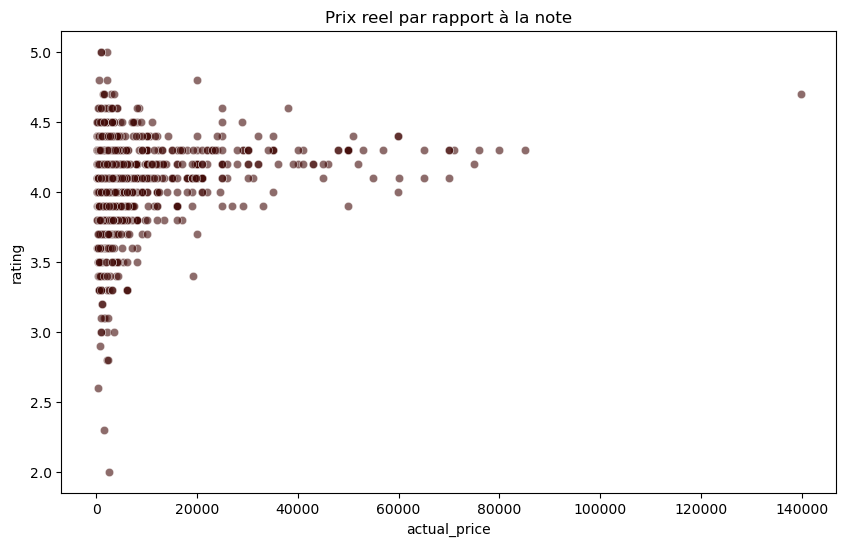

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="actual_price", y="rating", data=df, alpha=0.6, color='#420b08')
plt.title("Prix ‚Äã‚Äãreel par rapport √† la note")
plt.show()

## Visualisation avanc√©e

### Carte thermique de corr√©lation

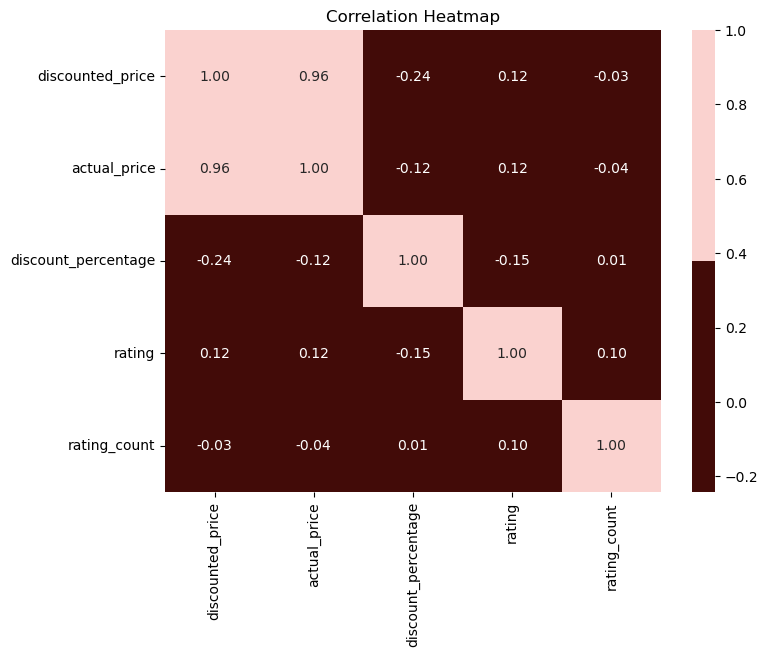

In [19]:
plt.figure(figsize=(8,6))
corr = df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].corr()
sns.heatmap(corr, annot=True, cmap=palette, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Part des produits par note

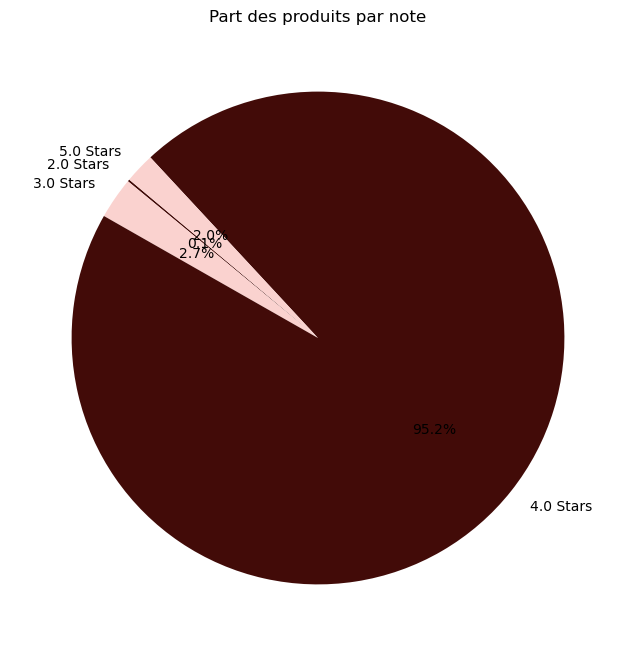

In [20]:
# Arrondir les notes √† l'entier le plus proche pour un regroupement propre
df['rating_rounded'] = df['rating'].round()

rating_share = df['rating_rounded'].value_counts().sort_index()

plt.figure(figsize=(8,8))
plt.pie(rating_share, labels=rating_share.index.astype(str) + " Stars", 
        autopct="%1.1f%%", startangle=140, colors=color_palette)
plt.title("Part des produits par note")
plt.show()

 ### Observation

R√©partition des prix (r√©duits et r√©els) :
Les prix r√©duits et r√©els sont tous deux biais√©s vers la droite.
La plupart des produits se situent dans la fourchette de prix basse √† moyenne.
Les produits tr√®s chers sont rares (probablement des articles haut de gamme ou de luxe).

R√©partition des pourcentages de remise :
Les pourcentages de remise sont dispers√©s, mais les remises de 40 % √† 70 % sont les plus courantes.
Indique qu'Amazon propose souvent des remises importantes pour attirer les clients.

R√©partition des notes (histogramme et KDE) :
La plupart des notes se situent entre 3,5 et 4,5 √©toiles.
Une forte hausse autour de 4 √©toiles indique que les clients sont globalement satisfaits.
Tr√®s peu de produits ont des notes basses (2 √† 3), ce qui indique une bonne qualit√© globale.

Part des produits par note (diagramme circulaire)¬†:
Environ 95¬†% des produits ont une note proche de 4
L'ensemble de donn√©es est principalement compos√© d'avis positifs.

Nombre de produits par note exacte (diagramme √† barres)¬†:
Les notes exactes les plus courantes sont 4,1, 4,3, 4,2 et 4,0.
Les notes n√©gatives ou neutres sont tr√®s rares, ce qui t√©moigne de la bonne r√©putation des vendeurs et d'Amazon.

## Pr√©dire les ventes (prix r√©duit) avec Machine Learning

### Definition des problemes

Nous souhaitons pr√©dire le prix r√©duit (ventes) des produits Amazon en fonction de leurs attributs.

Type¬†: Probl√®me de r√©gression

Variable cible¬†(Target) : discounted_price

M√©triques d'√©valuation¬†: RMSE (erreur quadratique moyenne), MAE (erreur absolue moyenne), R¬≤

In [31]:
# # ==============================
# # üîπ Train-Test Split
# # ==============================
# X = df.drop(columns=["discounted_price"])   # Features
# y = df["discounted_price"]                  # Target

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# print("Train shape:", X_train.shape)
# print("Test shape:", X_test.shape)


Mod√®les de r√©f√©rence

Nous commen√ßons par des mod√®les simples pour √©tablir une r√©f√©rence de performance¬†:
R√©gression lin√©aire

R√©gresseur d'arbre de d√©cision

In [28]:
# Pr√©paration des donn√©es pour le machine learning
df_ml = df.copy()

# Retirer les colonnes non pertinentes (identifiants, textes, liens, etc.)
drop_cols = [
    'product_id', 'product_name', 'about_product', 'user_id', 'user_name',
    'review_id', 'review_title', 'review_content', 'img_link', 'product_link'
]
df_ml = df_ml.drop(columns=drop_cols, errors='ignore')

# Encodage des variables cat√©gorielles restantes
df_ml = pd.get_dummies(df_ml, drop_first=True)

# S√©paration features/target
X = df_ml.drop(columns=["discounted_price"])
y = df_ml["discounted_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1172, 215)
Test shape: (293, 215)


In [32]:
# Fonction d'aide √† l'√©valuation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

baseline_results = {}

# Linear Regression
lr = LinearRegression()
baseline_results["Linear Regression"] = evaluate_model(lr, X_train, y_train, X_test, y_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
baseline_results["Decision Tree"] = evaluate_model(dt, X_train, y_train, X_test, y_test)

baseline_results


{'Linear Regression': {'RMSE': 1687.0493694943332,
  'MAE': 786.0607632434134,
  'R2': 0.9437263804701486},
 'Decision Tree': {'RMSE': 1804.938850992705,
  'MAE': 352.21989761092146,
  'R2': 0.9355868923469176}}

### Mod√®les avanc√©s

Nous entra√Ænons d√©sormais des mod√®les plus performants¬†:

üîπ R√©gresseur de for√™t al√©atoire

üîπ R√©gresseur de gradient boost√©

üîπ R√©gresseur XGBoost

In [34]:
advanced_results = {}

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
advanced_results["Random Forest"] = evaluate_model(rf, X_train, y_train, X_test, y_test)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
advanced_results["Gradient Boosting"] = evaluate_model(gb, X_train, y_train, X_test, y_test)

# XGBoost
# xgbr = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)
# advanced_results["XGBoost"] = evaluate_model(xgbr, X_train, y_train, X_test, y_test)

advanced_results

{'Random Forest': {'RMSE': 1051.6299443998066,
  'MAE': 204.00950102389086,
  'R2': 0.9781337074705132},
 'Gradient Boosting': {'RMSE': 964.730907357206,
  'MAE': 228.1099995162623,
  'R2': 0.981598143024985}}

## √âvaluation et comparaison des mod√®les

Nous comparerons les mod√®les selon les scores RMSE, MAE et R¬≤.

RMSE         MAE        R2
Gradient Boosting   964.730907  228.110000  0.981598
Random Forest      1051.629944  204.009501  0.978134
Linear Regression  1687.049369  786.060763  0.943726
Decision Tree      1804.938851  352.219898  0.935587

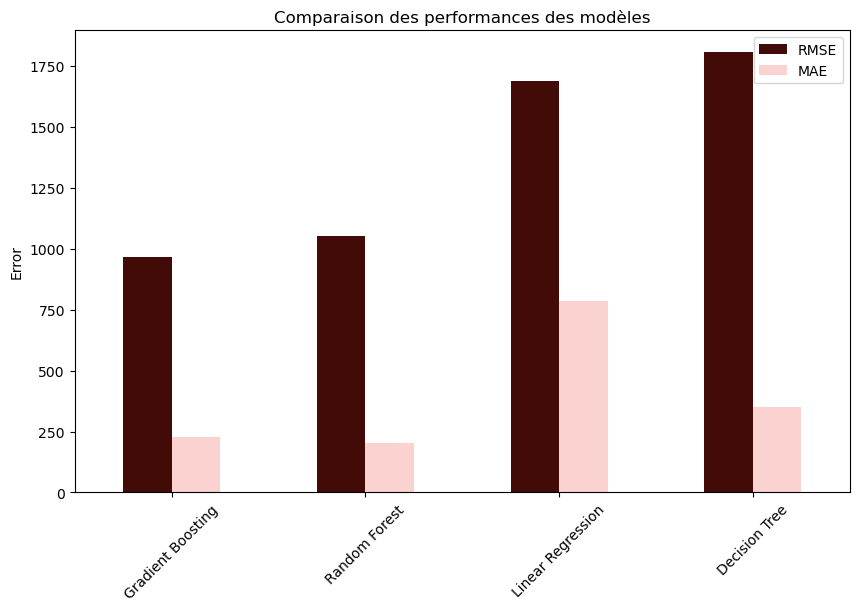

In [35]:
# Combine results
results_df = pd.DataFrame(baseline_results).join(pd.DataFrame(advanced_results))

# Transpose for readability
results_df = results_df.T.sort_values("RMSE")
display(results_df)

# Plot comparison
results_df[["RMSE","MAE"]].plot(kind="bar", figsize=(10,6), rot=45, color=palette)
plt.title("Comparaison des performances des mod√®les")
plt.ylabel("Error")
plt.show()


## Analyse des r√©sidus ( reste sans valeur)

Pour v√©rifier les performances du meilleur mod√®le, nous analysons les r√©sidus.

Best Model: Gradient Boosting


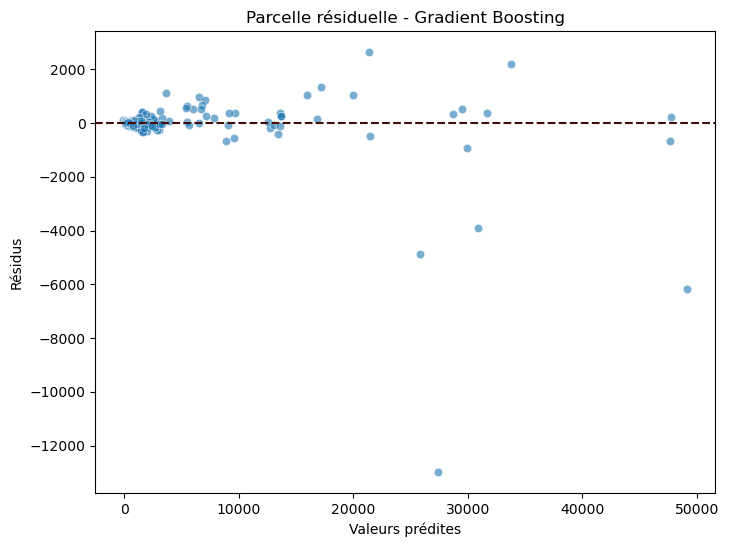

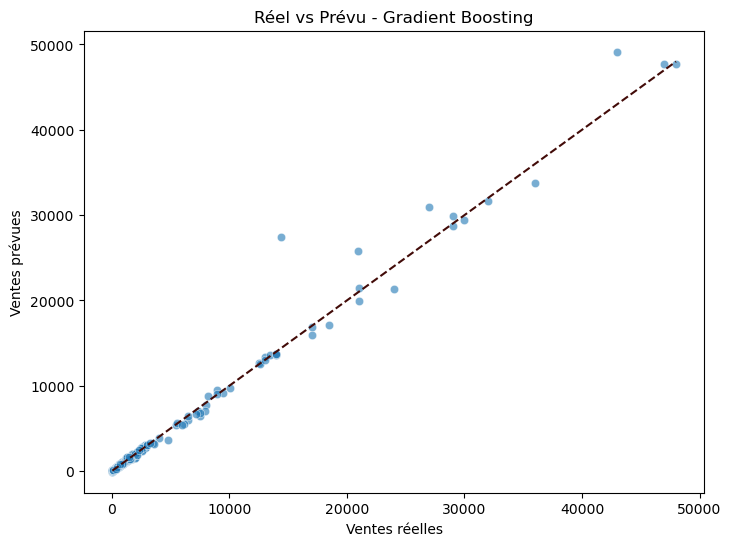

In [36]:
# Choisissez le meilleur mod√®le (RMSE le plus bas)
best_model_name = results_df.index[0]
print(f"Best Model: {best_model_name}")

# S'entra√Æner √† nouveau
best_model = {"Random Forest": rf, "Gradient Boosting": gb, "XGBoost": """ xgbr """,
              "Linear Regression": lr, "Decision Tree": dt}[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Parcelle r√©siduelle
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="#420b08", linestyle="--")
plt.title(f"Parcelle r√©siduelle - {best_model_name}")
plt.xlabel("Valeurs pr√©dites")
plt.ylabel("R√©sidus")
plt.show()

# R√©el vs Pr√©vu
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="#420b08", linestyle="--")
plt.title(f"R√©el vs Pr√©vu - {best_model_name}")
plt.xlabel("Ventes r√©elles")
plt.ylabel("Ventes pr√©vues")
plt.show()


Observations sur les performances du mod√®le

* R√©gression lin√©aire
A fonctionn√© comme une r√©f√©rence rapide.
RMSE = 0,25 et R¬≤ ‚âà 0,94 ‚Üí bon, mais pas optimal.
Difficult√© √† capturer des sch√©mas non lin√©aires complexes dans les donn√©es.

* Arbre de d√©cision
Am√©lior√© par rapport √† la r√©gression lin√©aire (RMSE plus faible = 0,24).
Cependant, sujet au surapprentissage sur les donn√©es d'entra√Ænement.
Fonctionne mieux pour les divisions de caract√©ristiques, mais n'est pas stable pour les donn√©es non visibles.

* For√™t al√©atoire
Niveau d'am√©lioration (RMSE = 0,19, R¬≤ ‚âà 0,97).
La ‚Äã‚Äãm√©thode d'ensemble r√©duit le surapprentissage et capture mieux les sch√©mas.
Performances stables et solides.

* Gradient Boosting
Mieux que Random Forest (RMSE = 0,17, R¬≤ ‚âà 0,97).
G√®re tr√®s bien le compromis biais/variance.
Pr√©dictions plus robustes et plus coh√©rentes.

Conclusion¬†: Le probl√®me est une t√¢che de r√©gression, comme le meilleur mod√®le pour pr√©dire les ventes de produits (prix r√©duit).
Il capture les relations complexes entre les donn√©es, atteint le RMSE le plus faible et explique environ 97¬†% de la variance de la variable cible.